# NLP with sentiment analysis

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [54]:
review = pd.read_csv('./datasets/imdb-reviews-pt-br.csv')

In [55]:
review.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg  
1  Este é um exemplo do motivo pelo qual a maiori...       neg  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg  
3  Nem mesmo os Beatles puderam escrever músicas ...       neg  
4  Filmes de fotos de latão não é uma palavra apr...       neg

In [56]:
review

id                                            text_en  \
0          1  Once again Mr. Costner has dragged out a movie...   
1          2  This is an example of why the majority of acti...   
2          3  First of all I hate those moronic rappers, who...   
3          4  Not even the Beatles could write songs everyon...   
4          5  Brass pictures movies is not a fitting word fo...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  
0      Mais uma vez, o Sr. Costner arrumou um filme p...       neg  
1      Este é um exemplo do motivo pelo qual a maiori...       neg  
2      Primeiro de tudo eu odeio esses raps imbecis, ...       neg  
3      Nem mesmo os Beatles puderam escrever músicas ...       neg  
4      Filmes de fotos de latão não é uma palavra apr...       neg  
...                                                  ...       ...  
49454  Como a média de votos era muito baixa, e o fat...       pos  
49455  O enredo teve algumas reviravoltas infelizes e...       pos  
49456  Estou espantado com a forma como este filme e ...       pos  
49457  A Christmas Together realmente veio antes do m...       pos  
49458  O drama romântico da classe trabalhadora do di...       pos  

[49459 rows x 4 columns]

In [57]:
train, test, class_train, class_test = train_test_split(review.text_pt, 
                                                        review.sentiment, 
                                                        test_size = 0.2, 
                                                        random_state = 42)

In [148]:
logistic_regression = LogisticRegression()
#logistic_regression.fit(train, class_train)
#accuracy = logistic_regression.score(test, class_test)
#print(accuracy)

In [59]:
print("Negative \n")
print(review.text_pt[review.sentiment == 'neg'].head())

Negative 

0    Mais uma vez, o Sr. Costner arrumou um filme p...
1    Este é um exemplo do motivo pelo qual a maiori...
2    Primeiro de tudo eu odeio esses raps imbecis, ...
3    Nem mesmo os Beatles puderam escrever músicas ...
4    Filmes de fotos de latão não é uma palavra apr...
Name: text_pt, dtype: object


In [60]:
print("Positive \n")
print(review.text_pt[review.sentiment == 'pos'].head())

Positive 

12389    Eu fui e vi este filme ontem à noite depois de...
12390    O diretor do ator, Bill Paxton, segue sua prom...
12391    Como um jogador de recreio com algum conhecime...
12392    Eu vi esse filme em uma prévia, e é delicioso....
12393    Bill Paxton levou a verdadeira história do gol...
Name: text_pt, dtype: object


In [61]:
# checking if the data is balanced
print(review.sentiment.value_counts())

sentiment
neg    24765
pos    24694
Name: count, dtype: int64


In [62]:
review.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg  
1  Este é um exemplo do motivo pelo qual a maiori...       neg  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg  
3  Nem mesmo os Beatles puderam escrever músicas ...       neg  
4  Filmes de fotos de latão não é uma palavra apr...       neg

In [63]:
# converting the sentiment to binary
classifications = review['sentiment'].replace(['neg', 'pos'], [0, 1])
review['classifications'] = classifications

In [64]:
review.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg   
1  Este é um exemplo do motivo pelo qual a maiori...       neg   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg   
4  Filmes de fotos de latão não é uma palavra apr...       neg   

   classifications  
0                0  
1                0  
2                0  
3                0  
4                0

In [65]:
review.tail()

id                                            text_en  \
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classifications  
49454                1  
49455                1  
49456                1  
49457                1  
49458                1

## Bag of Words: creating representations of human language for machines

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

text = ['Assisti um filme ótimo', 'Assisti um filme ruim']

vectorizer = CountVectorizer(lowercase=False)
bag_of_words = vectorizer.fit_transform(text)

In [67]:
vectorizer.get_feature_names_out()

array(['Assisti', 'filme', 'ruim', 'um', 'ótimo'], dtype=object)

In [68]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [69]:
sparse_matrix =  pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vectorizer.get_feature_names_out())

In [70]:
sparse_matrix

Assisti  filme  ruim  um  ótimo
0        1      1     0   1      1
1        1      1     1   1      0

In [71]:
vectorizer = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vectorizer.fit_transform(review.text_pt)
print(bag_of_words.shape)

(49459, 50)


In [72]:
def text_classifier(text, text_column, classification_column):
    vectorizer = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vectorizer.fit_transform(text[text_column])
    train, test, train_class, test_class = train_test_split(bag_of_words,
                                                              text[classification_column],
                                                              random_state = 42)
    logistic_regression = LogisticRegression(solver = "lbfgs")
    logistic_regression.fit(train, train_class)
    return logistic_regression.score(test, test_class)
print(text_classifier(review, "text_pt", "classifications"))

0.6583097452486858


## wordcloud: visual representation of text data

In [73]:
!pip install wordcloud


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
%matplotlib inline

from wordcloud import WordCloud

all_words = ' '.join([text for text in review.text_pt])

wordcloud = WordCloud(width= 800, height= 500, max_font_size = 110,).generate(all_words)

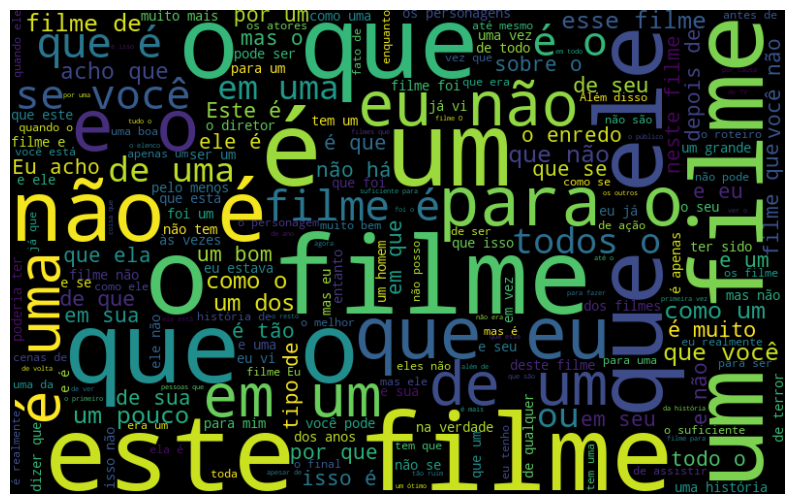

In [75]:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [76]:
def word_cloud_neg(text, column):
    text_negative = text.query("sentiment == 'neg'")
    all_words = ' '.join([text for text in text_negative[column]])
    wordcloud = WordCloud(width= 800, height= 500, max_font_size = 110,).generate(all_words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


In [77]:
def word_cloud_pos(text, column):
    text_positive = text.query("sentiment == 'neg'")
    all_words = ' '.join([text for text in text_positive[column]])
    wordcloud = WordCloud(width= 800, height= 500, max_font_size = 110,).generate(all_words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


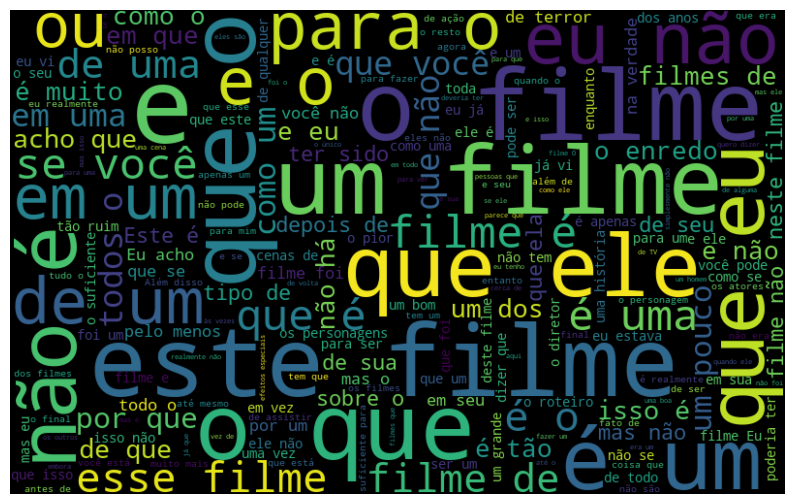

In [78]:
word_cloud_neg(review, "text_pt")

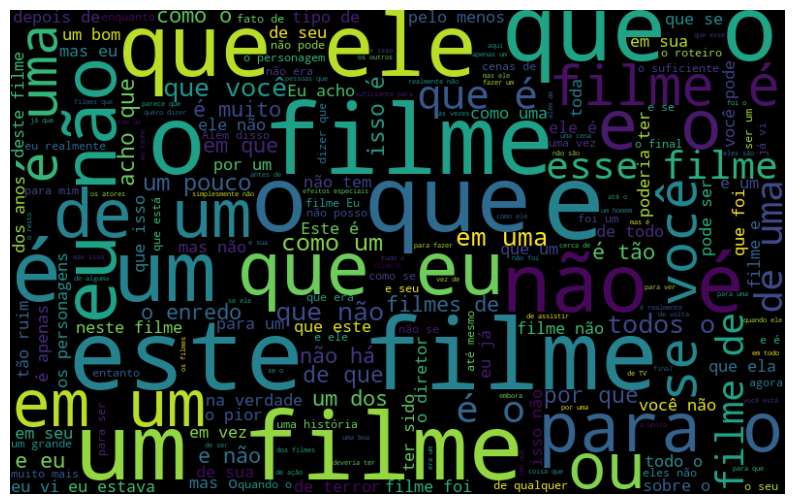

In [79]:
word_cloud_pos(review, "text_pt")

## NLTK: Natural Language Toolkit

In [80]:
!pip install -U nltk


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\juliano
[nltk_data]    |     soares\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\juliano
[nltk_data]    |     soares\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\juliano
[nltk_data]    |     soares\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\juliano
[nltk_data]    |     soares\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nlt

True

In [82]:
phrase = ['Assisti um filme ótimo', 'Assisti um filme ruim']
frequency = nltk.FreqDist(phrase)
frequency

FreqDist({'Assisti um filme ótimo': 1, 'Assisti um filme ruim': 1})

In [83]:
from nltk import tokenize

phrase = 'Assisti um filme ótimo.'

token_space = tokenize.WhitespaceTokenizer()
token_phrase = token_space.tokenize(phrase)
token_phrase

['Assisti', 'um', 'filme', 'ótimo.']

In [84]:
token_phrase = token_space.tokenize(all_words)
frequency = nltk.FreqDist(token_phrase)
df_frequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())})

In [85]:
df_frequency.nlargest(columns = "Frequency", n = 10)

Word  Frequency
20    de     417651
14   que     325070
42     e     299743
3      o     244881
7     um     216410
102    a     210179
45     é     192381
200   em     132778
1    uma     130888
29   não     127915

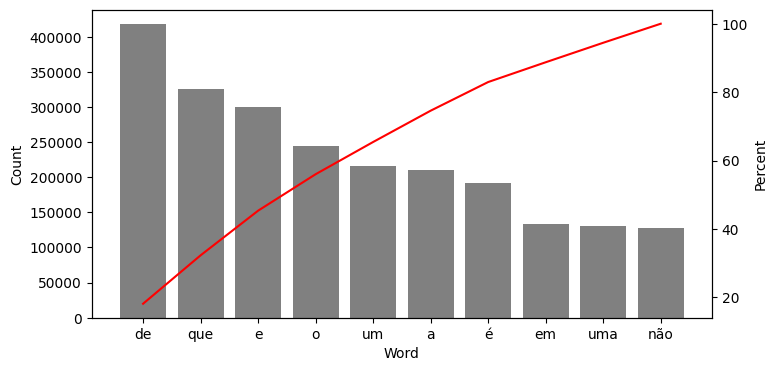

In [86]:
import seaborn as sns

def pareto(text, text_column, quantity):
    all_words = ' '.join([text for text in text[text_column]])
    token_space = tokenize.WhitespaceTokenizer()
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    
    total = df_frequency['Frequency'].sum()
    df_frequency['Percent'] = df_frequency['Frequency'].cumsum() / total * 100
    
    plt.figure(figsize=(8,4))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'gray')
    ax2 = ax.twinx()
    sns.lineplot(data=df_frequency, x='Word', y='Percent', color='red', sort=False, ax=ax2)
    ax.set(ylabel = "Count")
    plt.show()

pareto(review, "text_pt", 10)

In [87]:
stopwords = nltk.corpus.stopwords.words('portuguese')

processed_phrase = list()
for opinion in review.text_pt:
    new_phrase = list()
    phrase = token_space.tokenize(opinion)
    for word in phrase:
        if word not in stopwords:
            new_phrase.append(word)
    processed_phrase.append(' '.join(new_phrase))

review["treatment_1"] = processed_phrase

In [88]:
text_classifier(review, "treatment_1", "classifications")

0.6811160533764659

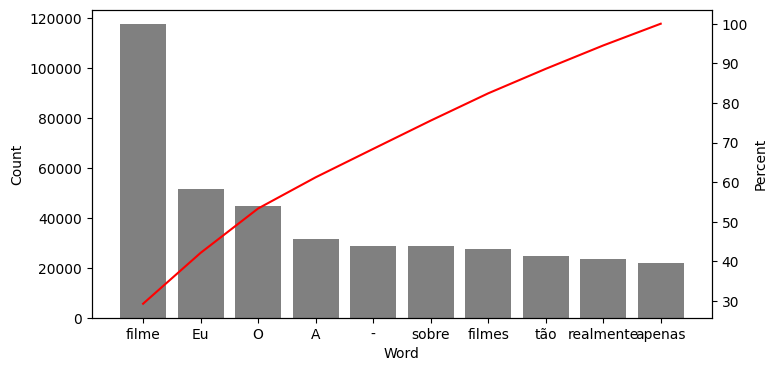

In [89]:
pareto(review, "treatment_1", 10)

In [90]:
phrase = "Olá mundo!"
token_points = tokenize.WordPunctTokenizer()
token_phrase = token_points.tokenize(phrase)

print(token_phrase)

['Olá', 'mundo', '!']


In [111]:
from string import punctuation

ponctuation = list()
for punct in punctuation:
    ponctuation.append(punct)

ponctuation_stopwords = ponctuation + stopwords

processed_phrase = list()
for opinion in review["treatment_1"]:
    new_phrase = list()
    phrase = token_points.tokenize(opinion)
    for word in phrase:
        if word not in ponctuation_stopwords:
            new_phrase.append(word)
    processed_phrase.append(' '.join(new_phrase))

review["treatment_2"] = processed_phrase

In [112]:
review.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg   
1  Este é um exemplo do motivo pelo qual a maiori...       neg   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg   
4  Filmes de fotos de latão não é uma palavra apr...       neg   

   classifications                                        treatment_1  \
0                0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1                0  Este exemplo motivo maioria filmes ação mesmos...   
2                0  Primeiro tudo odeio raps imbecis, poderiam agi...   
3                0  Nem Beatles puderam escrever músicas todos gos...   
4                0  Filmes fotos latão palavra apropriada eles, ve...   

                                         treatment_2  \
0  Mais vez Sr Costner arrumou filme tempo necess...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis poderiam agir...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada verdade ...   

                                        tratamento_3  
0  Mais vez , Sr . Costner arrumou filme tempo ne...  
1  Este exemplo motivo maioria filmes acao mesmos...  
2  Primeiro tudo odeio raps imbecis , poderiam ag...  
3  Nem Beatles puderam escrever musicas todos gos...  
4  Filmes fotos latao palavra apropriada eles , v...

In [113]:
review["treatment_1"][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [114]:
review["treatment_2"][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

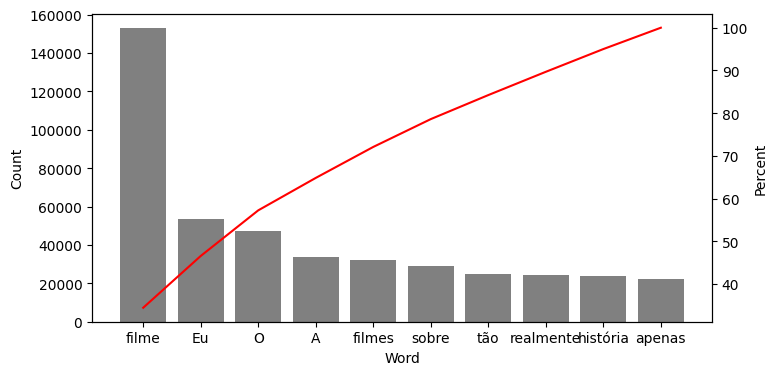

In [115]:
pareto(review, "treatment_2", 10)

In [97]:
!pip install unidecode

   ---------------------------------------- 0.0/235.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/235.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.5 kB ? eta -:--:--
   ----- --------------------------------- 30.7/235.5 kB 259.2 kB/s eta 0:00:01
   --------------- ----------------------- 92.2/235.5 kB 581.0 kB/s eta 0:00:01
   -------------------------------------- - 225.3/235.5 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 235.5/235.5 kB 1.2 MB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [WinError 2] O sistema não pode encontrar o arquivo especificado: 'c:\\Python311\\Scripts\\unidecode.exe' -> 'c:\\Python311\\Scripts\\unidecode.exe.deleteme'


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [116]:
import unidecode

acentos = "ótimo péssimo não é tão"

test = unidecode.unidecode(acentos)
print(test)

otimo pessimo nao e tao


In [117]:
sem_acentos = [unidecode.unidecode(text) for text in review["treatment_2"]]

In [118]:
sem_acentos[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [119]:
stopwords = [unidecode.unidecode(text) for text in ponctuation_stopwords]

In [120]:
stopwords

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'a',
 'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'as',
 'ate',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'eramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'esta',
 'estamos',
 'estao',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estavamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiveramos',
 'estiverem',
 'estivermos',
 'e

In [121]:
review["tratamento_3"] = sem_acentos

processed_phrase = list()
for opiniao in review["tratamento_3"]:
    new_phrase = list()
    text_words = token_points.tokenize(opiniao)
    for word in text_words:
        if word not in ponctuation_stopwords:
            new_phrase.append(word)
    processed_phrase.append(' '.join(text_words))

review["tratamento_3"] = processed_phrase

In [122]:
review["tratamento_3"][0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [123]:
treatment3_accuracy = text_classifier(review, "tratamento_3", "classifications")
print(treatment3_accuracy)

0.6887990295188031


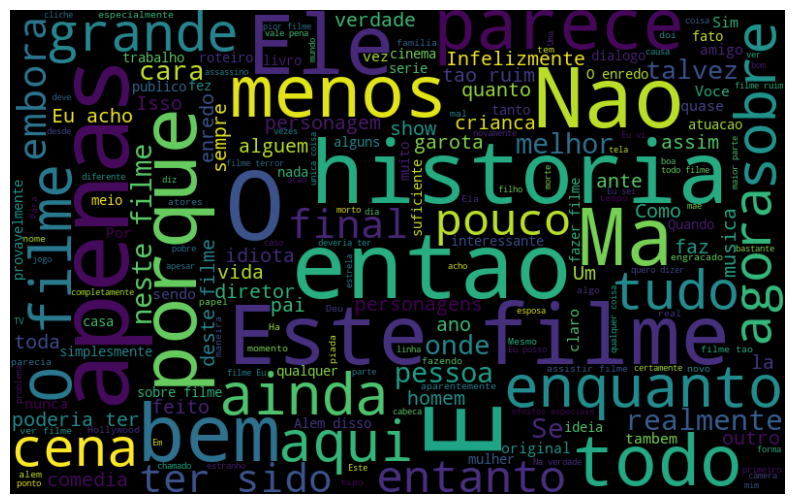

In [124]:
word_cloud_neg(review, "tratamento_3")

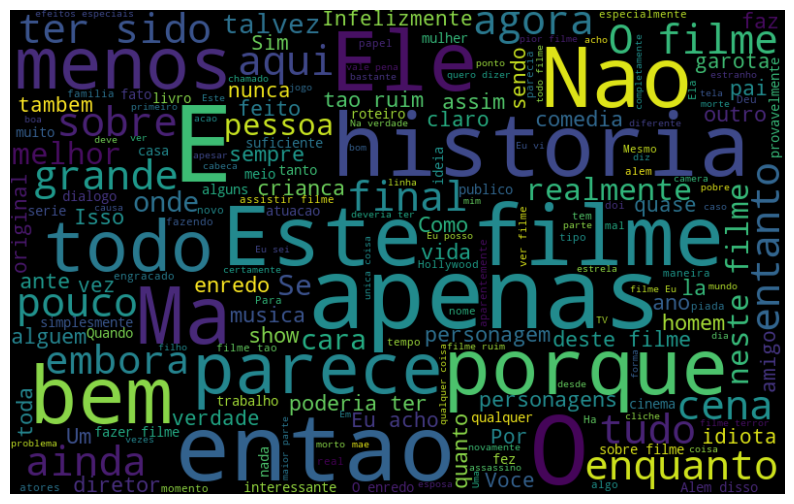

In [125]:
word_cloud_pos(review, "tratamento_3")

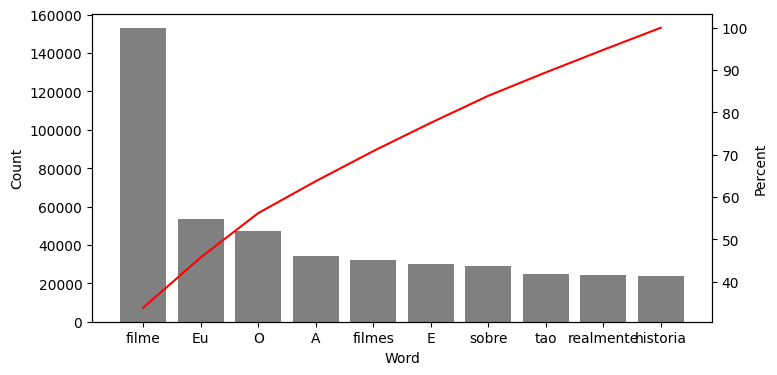

In [126]:
pareto(review, "tratamento_3", 10)

In [127]:
frase = "Texto em caixa alta"
print(frase.lower())

texto em caixa alta


In [128]:
processed_phrase = list()
for opinion in review["tratamento_3"]:
    new_phrase = list()
    opinion = opinion.lower()
    text_words = token_points.tokenize(opinion)
    for word in text_words:
        if word not in ponctuation_stopwords:
            new_phrase.append(word)
    processed_phrase.append(' '.join(new_phrase))

review["tratamento_4"] = processed_phrase

In [130]:
review["text_pt"][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [129]:
review["tratamento_4"][0]

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

In [131]:
treatment4_accuracy = text_classifier(review, "tratamento_4", "classifications")
print(treatment4_accuracy)

0.6874241811564901


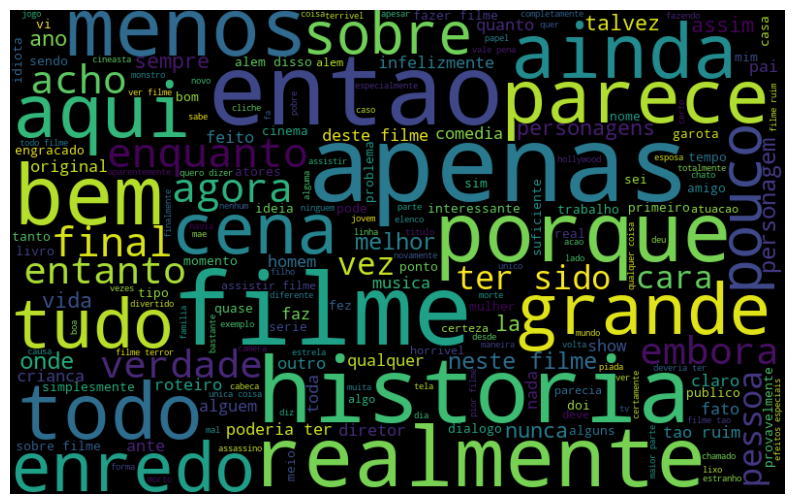

In [133]:
word_cloud_neg(review, "tratamento_4")

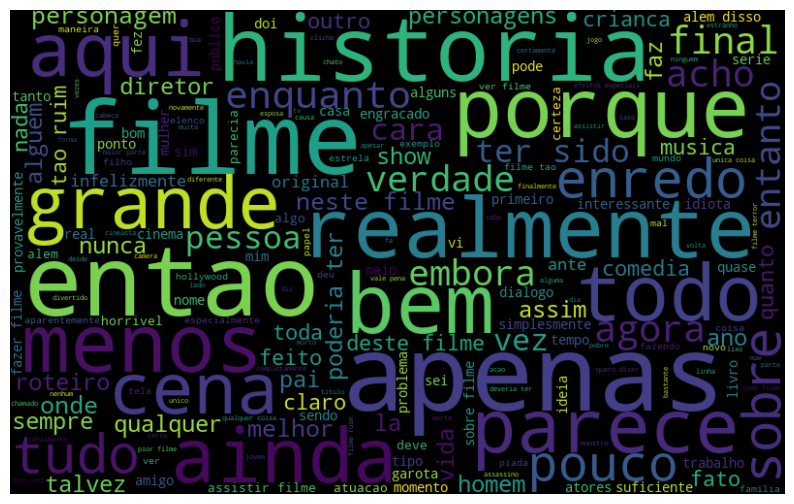

In [134]:
word_cloud_pos(review, "tratamento_4")

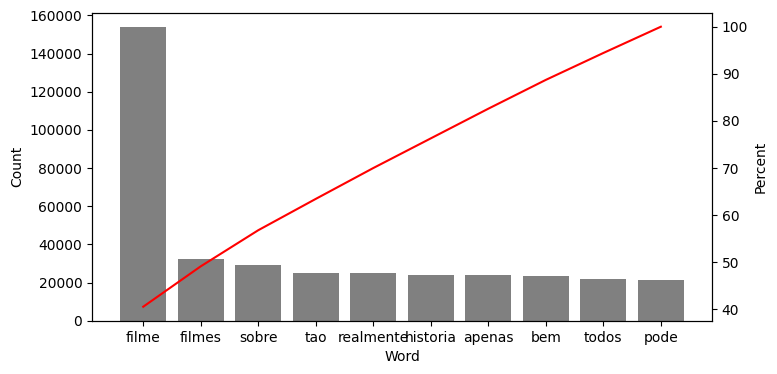

In [132]:
pareto(review, "tratamento_4", 10)

In [135]:
stemmer = nltk.RSLPStemmer()

print(stemmer.stem("corredor"))

corr


In [136]:
processed_phrase = list()
for opinion in review["tratamento_4"]:
    new_phrase = list()
    opinion = opinion.lower()
    text_words = token_points.tokenize(opinion)
    for word in text_words:
        if word not in ponctuation_stopwords:
            new_phrase.append(stemmer.stem(word))
    processed_phrase.append(' '.join(new_phrase))

review["tratamento_5"] = processed_phrase

In [137]:
accuracy_treatment5 = text_classifier(review, "tratamento_5", "classifications")
print(accuracy_treatment5)

0.6954306510311363


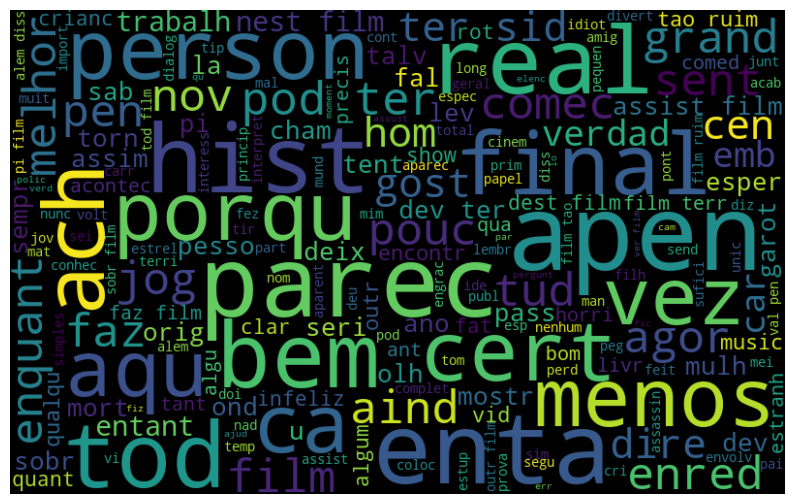

In [138]:
word_cloud_neg(review, "tratamento_5")

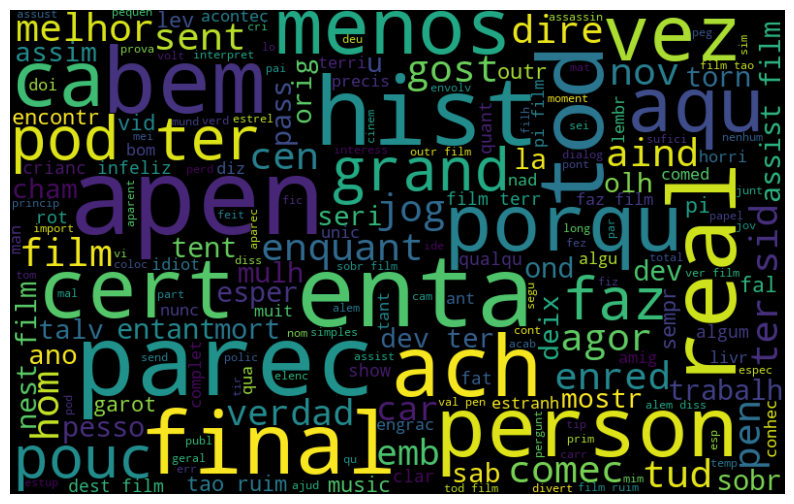

In [139]:
word_cloud_pos(review, "tratamento_5")

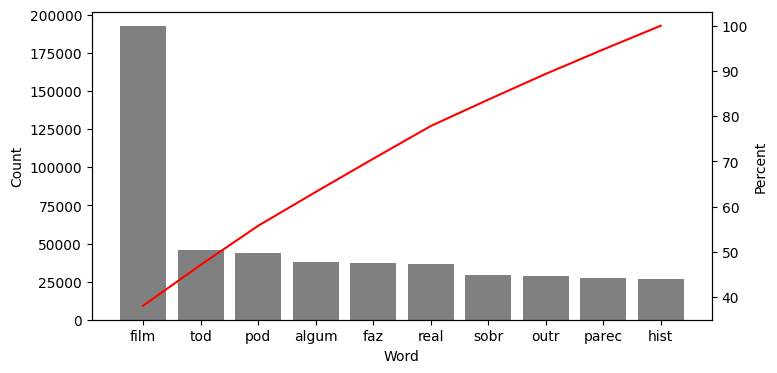

In [140]:
pareto(review, "tratamento_5", 10)

## TF-IDF: Term Frequency-Inverse Document Frequency

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ["Assisti um filme ótimo", "Assisti um filme péssimo"]

tfidf = TfidfVectorizer(lowercase=False, max_features=50)

caracteristicas = tfidf.fit_transform(frases)

pd.DataFrame(
    caracteristicas.todense(),
    columns=tfidf.get_feature_names_out()
)

Assisti     filme   péssimo        um     ótimo
0  0.448321  0.448321  0.000000  0.448321  0.630099
1  0.448321  0.448321  0.630099  0.448321  0.000000

In [149]:
tfidf_bruto = tfidf.fit_transform(review["text_pt"])
train, test, train_class, test_class = train_test_split(tfidf_bruto, review["classifications"], random_state = 42)

logistic_regression.fit(train, train_class)
acuracia_tfidf_bruto = logistic_regression.score(test, test_class)
print(acuracia_tfidf_bruto)

0.6600889607763849


In [150]:
tfidf_tratados = tfidf.fit_transform(review["tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados, review["classifications"], random_state = 42)

logistic_regression.fit(treino, classe_treino)
acuracia_tfidf_tratados = logistic_regression.score(teste, classe_teste)
print(acuracia_tfidf_tratados)

0.6963202587949858


In [ ]:
from nltk import ngrams

phrase = "Assisti um ótimo filme."
separate_phrase = token_space.tokenize(phrase)
pairs = ngrams(separate_phrase, 2)
list(pairs)

In [160]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(review["tratamento_5"])
train, test, class_train, class_test = train_test_split(vetor_tfidf,
                                                              review["classifications"],
                                                              random_state = 42)
logistic_regression.fit(train, class_train)
acuracia_tfidf_ngrams = logistic_regression.score(test, class_test)
print(acuracia_tfidf_ngrams)

0.8856449656287909


In [153]:
tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(review["tratamento_5"])
train, test, class_train, class_test = train_test_split(vetor_tfidf,
                                                              review["classifications"],
                                                              random_state = 42)
logistic_regression.fit(treino, classe_treino)
acuracia_tfidf = logistic_regression.score(teste, classe_teste)
print(acuracia_tfidf)

0.6963202587949858


In [163]:
pesos = pd.DataFrame(
    logistic_regression.coef_[0].T,
    index = tfidf.get_feature_names_out()
)
pesos.nlargest(10, 0)

0
otim      9.905861
excel     9.008890
perfeit   6.899348
maravilh  6.287748
favorit   5.890854
incri     5.762413
divert    5.386765
brilh     4.857927
ador      4.575856
hoj       4.492844

In [162]:
pesos.nsmallest(10,0)

0
ruim   -11.783101
pi     -11.462566
horri   -9.725877
terri   -8.404179
nad     -7.623785
chat    -7.517419
parec   -6.881806
nenhum  -6.380778
tent    -5.955765
mal     -5.712541